# Práctica 1: Distribución Binomial con un Dado

## Objetivos
1.  Medir la distribución del número de éxitos en bloques de $n$ lanzamientos.
2.  Calcular media y varianza y comparar con los valores teóricos.
3.  Verificar el ajuste con una prueba de Chi-cuadrado de bondad de ajuste.

## Definición del Experimento
Se analiza el número de veces que se obtiene un "6" (éxito) al lanzar un dado 20 veces. Este es un experimento que sigue una distribución binomial.

$X \sim \text{Bin}(n, p)$

Donde:
- $n = 20$ (número de lanzamientos en cada experimento)
- $p = 1/6$ (probabilidad de obtener un 6 en un solo lanzamiento)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom, chi2

# Cargar los datos
df = pd.read_csv('datos_practica1.csv')

# Renombrar columnas para facilitar el acceso
df.columns = ['experimento', 'lanzamientos', 'exitos']

# Mostrar los primeros 5 experimentos
df

,experimento,lanzamientos,exitos
0,1,20,3
1,2,20,4
2,3,20,2
3,4,20,5
4,5,20,3
5,6,20,1
6,7,20,6
7,8,20,4
8,9,20,3
9,10,20,2


## Media y Varianza Teórica

La media (o valor esperado) y la varianza de una distribución binomial se calculan con las siguientes fórmulas:

**Media teórica:**
$\mu = np$

**Varianza teórica:**
$\sigma^2 = np(1-p)$

In [12]:
# Parámetros de la distribución
n = 20
p = 1/6

# Cálculos teóricos
media_teorica = n * p
varianza_teorica = n * p * (1 - p)

print(f"Media teórica (μ): {media_teorica:.4f}")
print(f"Varianza teórica (σ²): {varianza_teorica:.4f}")

Media teórica (μ): 3.3333
Varianza teórica (σ²): 2.7778


## Estadísticos Muestrales

A partir de los datos recolectados, podemos calcular los estimadores de la media y la varianza.

**Media muestral:**
$\bar{k} = \frac{1}{N} \sum_{i=1}^{N} k_i$

**Varianza muestral (insesgada):**
$s^2 = \frac{1}{N-1} \sum_{i=1}^{N} (k_i - \bar{k})^2$

Donde:
- $N$ es el número total de experimentos.
- $k_i$ es el número de éxitos en el experimento $i$.

In [13]:
# Extraer la columna de 'exitos'
k_values = df['exitos']

# Calcular estadísticos muestrales
media_muestral = np.mean(k_values)
varianza_muestral = np.var(k_values, ddof=1)  # ddof=1 para varianza insesgada

print(f"Media muestral (k̄): {media_muestral:.4f}")
print(f"Varianza muestral (s²): {varianza_muestral:.4f}")

Media muestral (k̄): 3.3200
Varianza muestral (s²): 1.8933


## Comparación de Frecuencias Observadas y Esperadas

Para evaluar visualmente qué tan bien se ajustan nuestros datos a una distribución binomial, podemos graficar la frecuencia observada de cada número de éxitos y compararla con la distribución de probabilidad teórica.

La probabilidad de obtener exactamente $k$ éxitos en $n$ lanzamientos está dada por la **función de masa de probabilidad (PMF)** de la distribución binomial:

$P(X=k) = \binom{n}{k} p^k (1-p)^{n-k}$

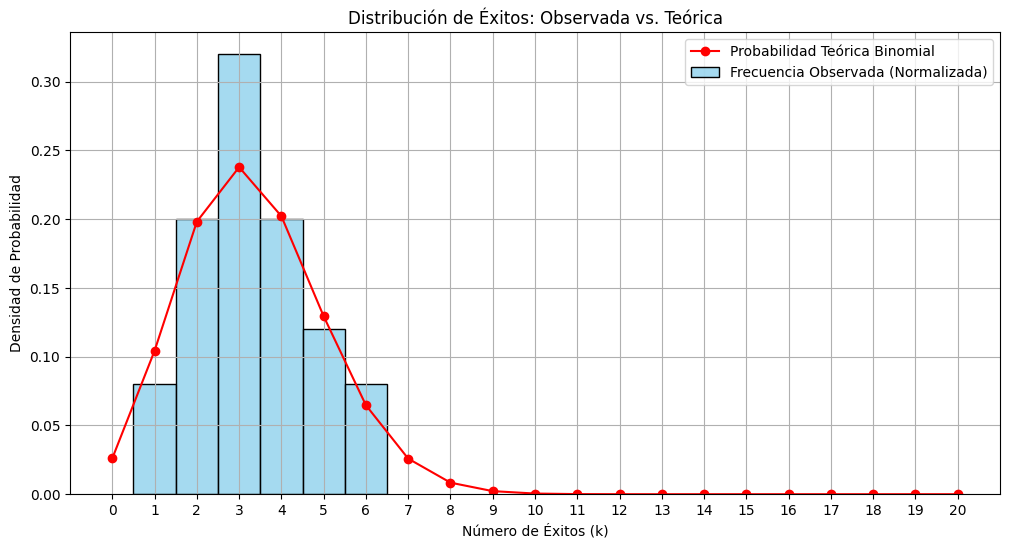

In [20]:
# Frecuencias observadas
frecuencias_observadas = k_values.value_counts().sort_index()

# Rango de posibles éxitos
k_range = np.arange(0, n + 1)

# Probabilidades teóricas
probabilidades_teoricas = binom.pmf(k_range, n, p)

# Gráfico de la distribución de frecuencias observadas
plt.figure(figsize=(12, 6))
sns.histplot(k_values, bins=np.arange(k_values.min(), k_values.max() + 2) - 0.5, stat='density', discrete=True, label='Frecuencia Observada (Normalizada)', color='skyblue')

# Gráfico de la distribución de probabilidad teórica
plt.plot(k_range, probabilidades_teoricas, 'ro-', label='Probabilidad Teórica Binomial')

plt.title('Distribución de Éxitos: Observada vs. Teórica')
plt.xlabel('Número de Éxitos (k)')
plt.ylabel('Densidad de Probabilidad')
plt.xticks(k_range)
plt.legend()
plt.grid(True)
plt.show()

## Prueba de Bondad de Ajuste Chi-cuadrado ($\chi^2$)

Para verificar formalmente si los datos observados se ajustan a la distribución binomial, utilizamos la prueba de Chi-cuadrado.

El estadístico de prueba se calcula como:
$\chi^2 = \sum_{i=1}^{m} \frac{(O_i - E_i)^2}{E_i}$

Donde:
- $O_i$ es la frecuencia observada para la categoría $i$.
- $E_i$ es la frecuencia esperada para la categoría $i$, calculada como $N \times P(X=k_i)$.
- $m$ es el número de categorías.

**Hipótesis:**
- $H_0$: Los datos siguen una distribución binomial con $n=20$ y $p=1/6$.
- $H_1$: Los datos no siguen dicha distribución.

Se comparará el valor de $\chi^2$ calculado con un valor crítico de la distribución Chi-cuadrado con $m-1$ grados de libertad y un nivel de significancia $\alpha$ (comúnmente 0.05). Si $\chi^2_{calculado} > \chi^2_{critico}$, se rechaza $H_0$.

In [16]:
# Número total de experimentos
N = len(df)

# Crear tabla de frecuencias
frec_observada = k_values.value_counts().sort_index()
df_frec = pd.DataFrame({'observada': frec_observada})

# Calcular frecuencias esperadas
df_frec['prob_teorica'] = binom.pmf(df_frec.index, n, p)
df_frec['esperada'] = df_frec['prob_teorica'] * N

# Agrupar categorías con frecuencia esperada < 5
# Esta es una práctica común para la prueba de Chi-cuadrado
umbral = 5
if (df_frec['esperada'] < umbral).any():
    # Agrupar las categorías de cola
    cola = df_frec[df_frec['esperada'] < umbral]
    if not cola.empty:
        cola_observada = cola['observada'].sum()
        cola_esperada = cola['esperada'].sum()
        
        # Eliminar filas de la cola
        df_frec = df_frec[df_frec['esperada'] >= umbral]
        
        # Añadir la categoría agrupada
        df_frec.loc['>= ' + str(cola.index.min())] = [cola_observada, np.nan, cola_esperada]

# Extraer frecuencias finales para la prueba
O = df_frec['observada'].values
E = df_frec['esperada'].values

# Calcular el estadístico Chi-cuadrado
chi2_calculado = np.sum((O - E)**2 / E)

# Grados de libertad
# m (número de categorías) - 1
grados_libertad = len(O) - 1

# Nivel de significancia
alpha = 0.05

# Valor crítico de Chi-cuadrado
chi2_critico = chi2.ppf(1 - alpha, grados_libertad)

# p-valor
p_valor = 1 - chi2.cdf(chi2_calculado, grados_libertad)

print("Tabla de Frecuencias para Prueba Chi-cuadrado:")
print(df_frec)
print("\n--- Resultados de la Prueba Chi-cuadrado ---")
print(f"Estadístico Chi-cuadrado calculado (χ²): {chi2_calculado:.4f}")
print(f"Grados de libertad: {grados_libertad}")
print(f"Valor crítico de Chi-cuadrado (α=0.05): {chi2_critico:.4f}")
print(f"p-valor: {p_valor:.4f}")

# Conclusión
if chi2_calculado > chi2_critico:
    print("\nConclusión: Se rechaza la hipótesis nula (H₀).")
    print("Los datos no parecen seguir una distribución binomial con n=20 y p=1/6.")
else:
    print("\nConclusión: No se puede rechazar la hipótesis nula (H₀).")
    print("Los datos son consistentes con una distribución binomial con n=20 y p=1/6.")

Tabla de Frecuencias para Prueba Chi-cuadrado:
        observada  prob_teorica   esperada
exitos                                    
3             8.0      0.237887   5.947164
4             5.0      0.202204   5.055090
>= 1         12.0           NaN  12.417261

--- Resultados de la Prueba Chi-cuadrado ---
Estadístico Chi-cuadrado calculado (χ²): 0.7232
Grados de libertad: 2
Valor crítico de Chi-cuadrado (α=0.05): 5.9915
p-valor: 0.6966

Conclusión: No se puede rechazar la hipótesis nula (H₀).
Los datos son consistentes con una distribución binomial con n=20 y p=1/6.
